In [1]:
import torch

x = torch.rand(5,3)
x

tensor([[0.7395, 0.5203, 0.6857],
        [0.9102, 0.3691, 0.0546],
        [0.7757, 0.2482, 0.9688],
        [0.9468, 0.9050, 0.6729],
        [0.3048, 0.7079, 0.9125]])

In [3]:
# print the second column
print(x[:,1])
# print the third row
print(x[2,:])

tensor([0.5203, 0.3691, 0.2482, 0.9050, 0.7079])
tensor([0.7757, 0.2482, 0.9688])


In [15]:
x = torch.randn(4,4)
print(x)
y = x.view(16)
# -1 means I don't know what to put here so figure it out
# from the other demension (can't put more than one !!!)
z = x.view(-1,8)
print(z)


tensor([[ 2.6984,  1.0681, -0.3024,  1.0608],
        [-0.4260,  1.5322, -0.0925,  2.3444],
        [ 0.7271,  1.3860,  2.0212, -1.9521],
        [ 0.4897, -0.4236, -1.7391,  1.6282]])
tensor([[ 2.6984,  1.0681, -0.3024,  1.0608, -0.4260,  1.5322, -0.0925,  2.3444],
        [ 0.7271,  1.3860,  2.0212, -1.9521,  0.4897, -0.4236, -1.7391,  1.6282]])


In [16]:
# Important note : when you convert from NP to Torch and vice versa 
# Pay attention that they still have the same reference !!!!


In [8]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

import torch
import torchvision
import torchvision.transforms as transforms



# https://discuss.pytorch.org/t/understanding-transform-normalize/21730
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


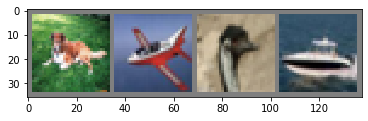

  dog plane  bird  ship


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# let's show some images

def imshow(img):
    img = img / 2 + 0.5 # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
# get some random training images
dataIter = iter(trainloader)

images, labels = dataIter.next()

# show the images
imshow(torchvision.utils.make_grid(images))
#print the labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))